# Maximum population growth rate ($r_m$) calculations

In [443]:
###### Population growth rate (r_m) calculations #######

rm(list=ls())
graphics.off()

require('tidyverse')
require('patchwork')
require('forcats')
require('car')
require('ggplot2')
require('cowplot')

Here we calculate the TPCs of $r_m$ in two ways: by first calculating the underlying trait TPCs and then mass correcting $r_m$, and alternatively, by first mass-correcting underlying traits and then caculating $r_m$.  

In [444]:
# Create argument containing target species

spps <- "case_when(species == 'Anoplophora glabripennis' ~ '1', 
species == 'Halyomorpha halys' ~ '2', 
species == 'Aedes aegypti' ~ '3',
species == 'Anthonomus grandis' ~ '4',
species == 'Paracoccus marginatus' ~ '5',
species == 'Acyrthosiphon pisum' ~ '6',
species == 'Aphis gossypii' ~ '7',
species == 'Bemisia tabaci' ~ '8',
species == 'Tetraneura nigriabdominalis' ~ '9',
species == 'Stethorus punctillum' ~ '10',
species == 'Tetranychus mcdanieli' ~ '11',
species == 'Muscidifurax zaraptor' ~ '12',
species == 'Aphis nasturtii' ~ '13',
species == 'Rhopalosiphum maidis' ~ '14',
species == 'Thrips hawaiiensis' ~ '15',
species == 'Helicoverpa armigera' ~ '16')"

In [445]:
# Read in the trait data

alpha <- as_tibble(read.csv('../data/AlphaPredictions.csv')) %>% 
         select(species, temp, alpha, alphaLwr, alphaUpr) %>%
         mutate(curve_ID = eval(parse(text=spps))) %>%
                              filter(curve_ID != 'NA')
                  
species <- alpha %>% distinct(species) %>% print(n=50)

head(alpha)

# A tibble: 16 x 1
   species                    
   <chr>                      
 1 Bemisia tabaci             
 2 Tetraneura nigriabdominalis
 3 Stethorus punctillum       
 4 Tetranychus mcdanieli      
 5 Muscidifurax zaraptor      
 6 Aphis nasturtii            
 7 Rhopalosiphum maidis       
 8 Aedes aegypti              
 9 Anoplophora glabripennis   
10 Anthonomus grandis         
11 Helicoverpa armigera       
12 Paracoccus marginatus      
13 Halyomorpha halys          
14 Thrips hawaiiensis         
15 Acyrthosiphon pisum        
16 Aphis gossypii             


species,temp,alpha,alphaLwr,alphaUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Bemisia tabaci,0.00000000,202.1359,243.5009,169.7598,8
Bemisia tabaci,0.04504505,201.1558,242.2494,168.9927,8
Bemisia tabaci,0.09009009,200.1807,241.0047,168.2292,8
Bemisia tabaci,0.13513514,199.2107,239.7668,167.4694,8
Bemisia tabaci,0.18018018,198.2457,238.5357,166.7133,8
Bemisia tabaci,0.22522523,197.2857,237.3113,165.9609,8


In [446]:
#±±±±±±±±±±±±±±±±±±±±±±±±±±±±±
zj <- as_tibble(read.csv('../data/ZetaJPredictions.csv')) %>% 
         select(species, temp, zj, zjLwr, zjUpr) %>%
         mutate(curve_ID = eval(parse(text=spps))) %>%
         filter(curve_ID != 'NA') %>%
         arrange(curve_ID) %>% 
         mutate(temp = as.numeric(temp)) %>%
         rename(zjspecies = species, zjtemp = temp, zjcurve_ID = curve_ID)

In [447]:
#±±±±±±±±±±±±±±±±±±±±±±±±±±±±±
z  <- as_tibble(read.csv('../data/ZetaPredictions.csv'))  %>% 
        select(species, temp, z, zLwr, zUpr) %>%
        mutate(curve_ID = eval(parse(text=spps))) %>%
        filter(curve_ID != 'NA') %>%
        arrange(curve_ID) %>% mutate(temp = as.numeric(temp)) %>%
        rename(zspecies = species, ztemp = temp, zcurve_ID = curve_ID)

In [448]:
#±±±±±±±±±±±±±±±±±±±±±±±±±±±±±
bmax <- as_tibble(read.csv('../data/BetaPredictions.csv'))  %>% 
          select(species, temp, bmax, bmaxLwr, bmaxUpr) %>%
          mutate(curve_ID = eval(parse(text=spps))) %>%
          filter(curve_ID != 'NA') %>%
          arrange(curve_ID) %>% mutate(temp = as.numeric(temp)) %>%
          rename(bmaxspecies = species, bmaxtemp = temp, bmaxcurve_ID = curve_ID) %>%
          filter(bmaxspecies != 'NA')

In [449]:
df <- bind_cols(alpha, zj, z, bmax) %>% 
      select(curve_ID, species, temp, alpha, alphaLwr, alphaUpr,
             zj, zjLwr, zjUpr, z, zLwr, zUpr, bmax, bmaxLwr, bmaxUpr) %>%
      mutate(kappa = 0.01)

head(df)

curve_ID,species,temp,alpha,alphaLwr,alphaUpr,zj,zjLwr,zjUpr,z,zLwr,zUpr,bmax,bmaxLwr,bmaxUpr,kappa
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Bemisia tabaci,0.00000000,202.1359,243.5009,169.7598,0.01945223,0.07581978,0.008407724,0.1134038,1.0192422,0.04537410,0.05883476,0.01313070,0.1157353,0.01
8,Bemisia tabaci,0.04504505,201.1558,242.2494,168.9927,0.01929008,0.07486896,0.008359401,0.1114940,0.9791129,0.04493682,0.05918183,0.01324965,0.1162211,0.01
8,Bemisia tabaci,0.09009009,200.1807,241.0047,168.2292,0.01912934,0.07393036,0.008311371,0.1096178,0.9433949,0.04450413,0.05953083,0.01336964,0.1167088,0.01
8,Bemisia tabaci,0.13513514,199.2107,239.7668,167.4694,0.01896998,0.07300383,0.008263633,0.1077748,0.9089964,0.04407598,0.05988177,0.01349068,0.1171984,0.01
8,Bemisia tabaci,0.18018018,198.2457,238.5357,166.7133,0.01881200,0.07208921,0.008216184,0.1059643,0.8758682,0.04365233,0.06023467,0.01361277,0.1176899,0.01
8,Bemisia tabaci,0.22522523,197.2857,237.3113,165.9609,0.01865540,0.07118634,0.008169024,0.1041858,0.8439630,0.04319497,0.06058952,0.01373593,0.1181833,0.01


In [450]:
bodyMass <- as_tibble(read.csv('../data/sizeMeans.csv')) %>% 
            rename(species = interactor1, mass = avg, mass_sd = sd) %>% 
            mutate(curve_ID = eval(parse(text=spps))) %>%
           filter(curve_ID != 'NA') %>% arrange(curve_ID)

head(bodyMass)

species,mass,mass_sd,curve_ID
<chr>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,159.8000000,NA,1
Stethorus punctillum,0.4800000,0.0424264069,10
Tetranychus mcdanieli,0.0243000,0.0002828427,11
Muscidifurax zaraptor,0.8950000,0.0932737905,12
Aphis nasturtii,0.8673000,0.3252394195,13
Rhopalosiphum maidis,0.2995714,0.1664730780,14


In [451]:
df <- df %>% inner_join(bodyMass)

head(df)

Joining, by = c("curve_ID", "species")



curve_ID,species,temp,alpha,alphaLwr,alphaUpr,zj,zjLwr,zjUpr,z,zLwr,zUpr,bmax,bmaxLwr,bmaxUpr,kappa,mass,mass_sd
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Bemisia tabaci,0.00000000,202.1359,243.5009,169.7598,0.01945223,0.07581978,0.008407724,0.1134038,1.0192422,0.04537410,0.05883476,0.01313070,0.1157353,0.01,0.293125,0.02984454
8,Bemisia tabaci,0.04504505,201.1558,242.2494,168.9927,0.01929008,0.07486896,0.008359401,0.1114940,0.9791129,0.04493682,0.05918183,0.01324965,0.1162211,0.01,0.293125,0.02984454
8,Bemisia tabaci,0.09009009,200.1807,241.0047,168.2292,0.01912934,0.07393036,0.008311371,0.1096178,0.9433949,0.04450413,0.05953083,0.01336964,0.1167088,0.01,0.293125,0.02984454
8,Bemisia tabaci,0.13513514,199.2107,239.7668,167.4694,0.01896998,0.07300383,0.008263633,0.1077748,0.9089964,0.04407598,0.05988177,0.01349068,0.1171984,0.01,0.293125,0.02984454
8,Bemisia tabaci,0.18018018,198.2457,238.5357,166.7133,0.01881200,0.07208921,0.008216184,0.1059643,0.8758682,0.04365233,0.06023467,0.01361277,0.1176899,0.01,0.293125,0.02984454
8,Bemisia tabaci,0.22522523,197.2857,237.3113,165.9609,0.01865540,0.07118634,0.008169024,0.1041858,0.8439630,0.04319497,0.06058952,0.01373593,0.1181833,0.01,0.293125,0.02984454


In [452]:
#---------------------------------- Define parameters -------------------------------#

zj    <- df$zj
alpha <- df$alpha
z     <- df$z
bmax   <- df$bmax
k     <- df$kappa

# Calculate rmax
df <- df %>% mutate(rm_opt = (((k+z)*((log(bmax/(k+z)))-(alpha*zj)))/(alpha*(k+z)+1)))

# lower
zj_lwr    <- df$zjLwr
alpha_lwr <- df$alphaLwr
z_lwr     <- df$zLwr
bmax_lwr  <- df$bmaxLwr
k         <- df$kappa

df <- df %>% mutate(rm_optLwr = (((k+z_lwr)*((log(bmax_lwr/(k+z_lwr)))-(alpha_lwr*zj_lwr)))/(alpha_lwr*(k+z_lwr)+1)))

# upper 
zj_upr    <- df$zjUpr
alpha_upr <- df$alphaUpr
z_upr     <- df$zUpr
bmax_upr  <- df$bmaxUpr
k         <- df$kappa

df <- df %>% mutate(rm_optUpr = (((k+z_upr)*((log(bmax_upr/(k+z_upr)))-(alpha_upr*zj_upr)))/(alpha_upr*(k+z_upr)+1)))


# # Calculate rm with mass-corrected trait values

load("../results/a_MTE_model.Rdata") 
load("../results/zj_MTE_model.Rdata") 
load("../results/z_MTE_model.Rdata") 
load("../results/bmax_MTE_model.Rdata")

zj1    <- df$zj/(df$mass^coef(zj_model)[2])
alpha1 <- df$alpha/(df$mass^coef(a_model)[2])
z1     <- df$z/(df$mass^coef(z_model)[2])
bmax1   <- df$bmax/(df$mass^coef(bmax_model)[2])

df <- df %>% mutate(rm_opt1 = (((k+z1)*((log(bmax1/(k+z1)))-(alpha1*zj1)))/(alpha1*(k+z1)+1)))

write_csv(df, '../results/r_mCalcs.csv')

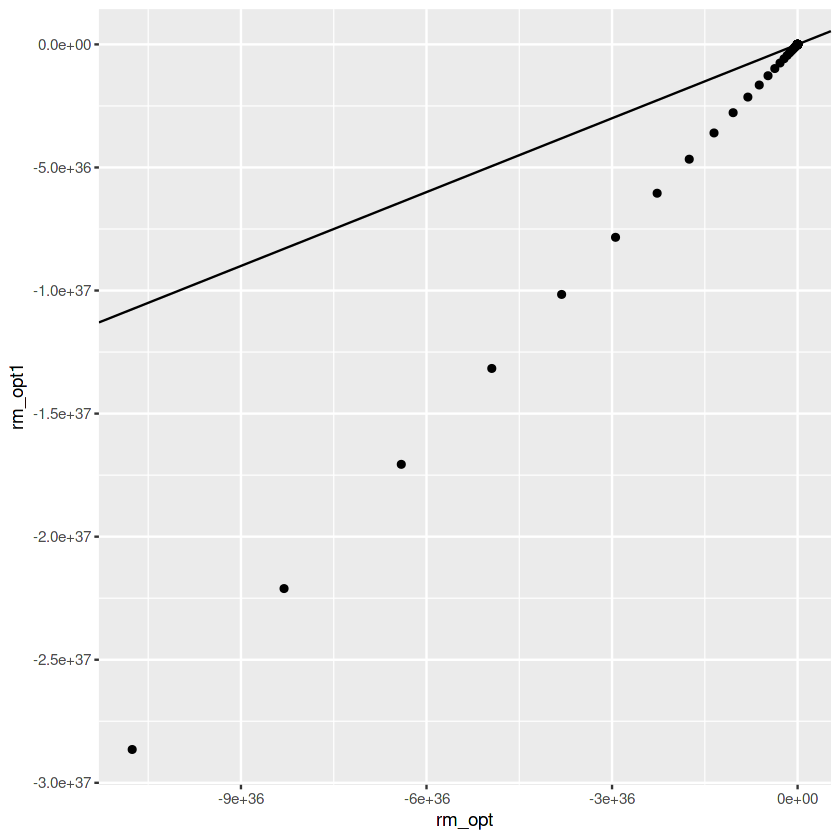

In [453]:
ggplot(df, aes(x=rm_opt, y=rm_opt1)) + 
    geom_point() + 
    geom_abline(slope=1)

In [454]:
head(df)

curve_ID,species,temp,alpha,alphaLwr,alphaUpr,zj,zjLwr,zjUpr,z,⋯,bmax,bmaxLwr,bmaxUpr,kappa,mass,mass_sd,rm_opt,rm_optLwr,rm_optUpr,rm_opt1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Bemisia tabaci,0.00000000,202.1359,243.5009,169.7598,0.01945223,0.07581978,0.008407724,0.1134038,⋯,0.05883476,0.01313070,0.1157353,0.01,0.293125,0.02984454,-0.02222573,-0.09335942,-0.003674289,-0.01764463
8,Bemisia tabaci,0.04504505,201.1558,242.2494,168.9927,0.01929008,0.07486896,0.008359401,0.1114940,⋯,0.05918183,0.01324965,0.1162211,0.01,0.293125,0.02984454,-0.02196683,-0.09228710,-0.003543713,-0.01738096
8,Bemisia tabaci,0.09009009,200.1807,241.0047,168.2292,0.01912934,0.07393036,0.008311371,0.1096178,⋯,0.05953083,0.01336964,0.1167088,0.01,0.293125,0.02984454,-0.02170863,-0.09123850,-0.003413130,-0.01711758
8,Bemisia tabaci,0.13513514,199.2107,239.7668,167.4694,0.01896998,0.07300383,0.008263633,0.1077748,⋯,0.05988177,0.01349068,0.1171984,0.01,0.293125,0.02984454,-0.02145110,-0.09020025,-0.003282541,-0.01685449
8,Bemisia tabaci,0.18018018,198.2457,238.5357,166.7133,0.01881200,0.07208921,0.008216184,0.1059643,⋯,0.06023467,0.01361277,0.1176899,0.01,0.293125,0.02984454,-0.02119425,-0.08917218,-0.003151947,-0.01659168
8,Bemisia tabaci,0.22522523,197.2857,237.3113,165.9609,0.01865540,0.07118634,0.008169024,0.1041858,⋯,0.06058952,0.01373593,0.1181833,0.01,0.293125,0.02984454,-0.02093806,-0.08815411,-0.003017247,-0.01632915


In [455]:
# truncate data for plotting 

rmData <- df %>%
  mutate_at(vars(c(rm_opt)), 
            ~ifelse(rm_opt < -0.001, -0.001, .)) %>%
  mutate_at(vars(c(rm_optLwr)), 
            ~ifelse(rm_optLwr < -0.001, -0.001, .)) %>%
  mutate_at(vars(c(rm_optUpr)), 
            ~ifelse(rm_optUpr < -0.001, -0.001, .)) %>%
  filter(rm_opt > -0.001)

# rmData1 <- df %>%
#   mutate_at(vars(c(rm_opt1)), 
#             ~ifelse(rm_opt1 < -0.001, -0.001, .)) %>%
#   filter(rm_opt1 > -0.001)

In [456]:
head(rmData)
# head(rmData1)

curve_ID,species,temp,alpha,alphaLwr,alphaUpr,zj,zjLwr,zjUpr,z,⋯,bmax,bmaxLwr,bmaxUpr,kappa,mass,mass_sd,rm_opt,rm_optLwr,rm_optUpr,rm_opt1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Bemisia tabaci,4.189189,129.4968,151.4953,112.3581,0.009036291,0.02327868,0.004944840,0.02565910,⋯,0.1008423,0.03000157,0.1705268,0.01,0.293125,0.02984454,-8.291047e-04,-0.001,0.008499627,0.004676601
8,Bemisia tabaci,4.234234,128.8876,150.7277,111.8723,0.008963255,0.02299619,0.004915170,0.02529200,⋯,0.1014192,0.03026590,0.1712830,0.01,0.293125,0.02984454,-6.337898e-04,-0.001,0.008622877,0.004874923
8,Bemisia tabaci,4.279279,128.2816,149.9643,111.3887,0.008890833,0.02271722,0.004885687,0.02493138,⋯,0.1019993,0.03053247,0.1720424,0.01,0.293125,0.02984454,-4.394227e-04,-0.001,0.008749384,0.005072005
8,Bemisia tabaci,4.324324,127.6785,149.2049,110.9074,0.008819021,0.02244173,0.004856392,0.02457715,⋯,0.1025826,0.03080131,0.1728048,0.01,0.293125,0.02984454,-2.460088e-04,-0.001,0.008870981,0.005267842
8,Bemisia tabaci,4.369369,127.0786,148.4497,110.4245,0.008747814,0.02216905,0.004827282,0.02422917,⋯,0.1031689,0.03107242,0.1735704,0.01,0.293125,0.02984454,-5.355317e-05,-0.001,0.008992110,0.005462431
8,Bemisia tabaci,4.414414,126.4816,147.6985,109.9392,0.008677205,0.02189976,0.004798357,0.02388736,⋯,0.1037585,0.03134583,0.1743391,0.01,0.293125,0.02984454,1.379391e-04,-0.001,0.009120493,0.005655768


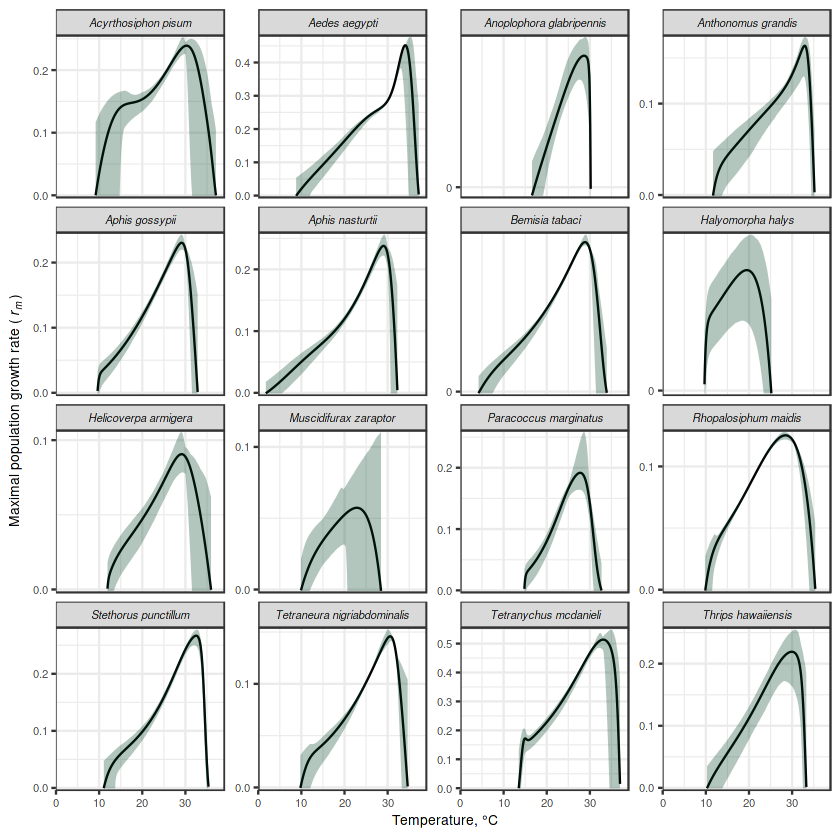

In [457]:
# plot r_m TPCs

rmPlot <- ggplot()+
  geom_line(aes(temp, rm_opt), rmData)+
  facet_wrap(~species, ncol = 4, scales = "free_y")+
  scale_y_continuous(expression(plain(paste(" Maximal population growth rate ("~italic(r[m])~")"))),
                     # limits=c(-0.001,0.6),
                     expand = c(0.01, 0),
                     breaks=seq(0,0.5, by=0.1))+
  theme_bw()+
  geom_ribbon(aes(temp, ymin=rm_optLwr, ymax=rm_optUpr), rmData, fill="#004225",alpha=0.3)+
  theme(text = element_text(size=8))+theme(strip.text = element_text(face = "italic"))+
  labs(x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none')

rmPlot

In [458]:
# # plot r_m TPCs with size corrections

# rmPlot1 <- ggplot()+
#   geom_line(aes(temp, rm_opt1), rmData1)+
#   facet_wrap(~species, ncol = 4, scales = "free_y")+
#   scale_y_continuous(expression(plain(paste(" Maximal population growth rate ("~italic(r[m])~")"))),
#                      # limits=c(-0.001,0.6),
#                      expand = c(0.01, 0),
#                      breaks=seq(0,0.5, by=0.1))+
#   theme_bw()+
#   # geom_ribbon(aes(temp, ymin=rm_optLwr, ymax=rm_optUpr), rmData, fill="#004225",alpha=0.3)+
#   theme(text = element_text(size=8))+theme(strip.text = element_text(face = "italic"))+
#   labs(x=expression(plain(paste(" Temperature, ",degree,"C"))))+
#   theme(legend.position = 'none')

# rmPlot1

In [459]:
save_plot(rmPlot, file="../results/rmTPCs1.pdf", 
          base_height=15, base_width = 17.5, base_asp = 1, units="cm")

In [460]:
#=======================================================================
# plot mass corrected value of r_m at Topt against the peak temperature for r_m

rmMass <- df %>% group_by(species) %>% slice(which.max(rm_opt)) %>%
  select(curve_ID, species, temp, rm_opt, rm_optLwr, rm_optUpr,) %>%
  arrange(curve_ID) 

head(rmMass)

curve_ID,species,temp,rm_opt,rm_optLwr,rm_optUpr
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anoplophora glabripennis,28.64865,0.01510336,0.0115713,0.01719946
10,Stethorus punctillum,32.47748,0.26677117,0.2486943,0.27684512
11,Tetranychus mcdanieli,33.10811,0.51367500,0.4727377,0.52546725
12,Muscidifurax zaraptor,22.83784,0.05732966,-14.9437508,0.08514682
13,Aphis nasturtii,29.05405,0.23802002,0.2222934,0.25571627
14,Rhopalosiphum maidis,28.46847,0.12522888,0.1278068,0.12184787


In [461]:
bodyMass <- bodyMass %>% select(mass, curve_ID)

head(bodyMass)

mass,curve_ID
<dbl>,<chr>
159.8000000,1
0.4800000,10
0.0243000,11
0.8950000,12
0.8673000,13
0.2995714,14


In [462]:
rm_data <- rmMass %>% inner_join(bodyMass) %>% select(-curve_ID)

head(rm_data)

write_csv(rm_data, '../results/rm_optSizeScaling.csv')

Joining, by = "curve_ID"



species,temp,rm_opt,rm_optLwr,rm_optUpr,mass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,28.64865,0.01510336,0.0115713,0.01719946,159.8000000
Stethorus punctillum,32.47748,0.26677117,0.2486943,0.27684512,0.4800000
Tetranychus mcdanieli,33.10811,0.51367500,0.4727377,0.52546725,0.0243000
Muscidifurax zaraptor,22.83784,0.05732966,-14.9437508,0.08514682,0.8950000
Aphis nasturtii,29.05405,0.23802002,0.2222934,0.25571627,0.8673000
Rhopalosiphum maidis,28.46847,0.12522888,0.1278068,0.12184787,0.2995714


In [463]:
#===================================================
# mass-corrected r_m opt vs r_m Tpks

rm_data$kT <- 1/(8.617333262145 * 10^-5 * (rm_data$temp+273.15))
head(rm_data)


species,temp,rm_opt,rm_optLwr,rm_optUpr,mass,kT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,28.64865,0.01510336,0.0115713,0.01719946,159.8000000,38.45119
Stethorus punctillum,32.47748,0.26677117,0.2486943,0.27684512,0.4800000,37.96949
Tetranychus mcdanieli,33.10811,0.51367500,0.4727377,0.52546725,0.0243000,37.89130
Muscidifurax zaraptor,22.83784,0.05732966,-14.9437508,0.08514682,0.8950000,39.20606
Aphis nasturtii,29.05405,0.23802002,0.2222934,0.25571627,0.8673000,38.39961
Rhopalosiphum maidis,28.46847,0.12522888,0.1278068,0.12184787,0.2995714,38.47416


`geom_smooth()` using formula 'y ~ x'



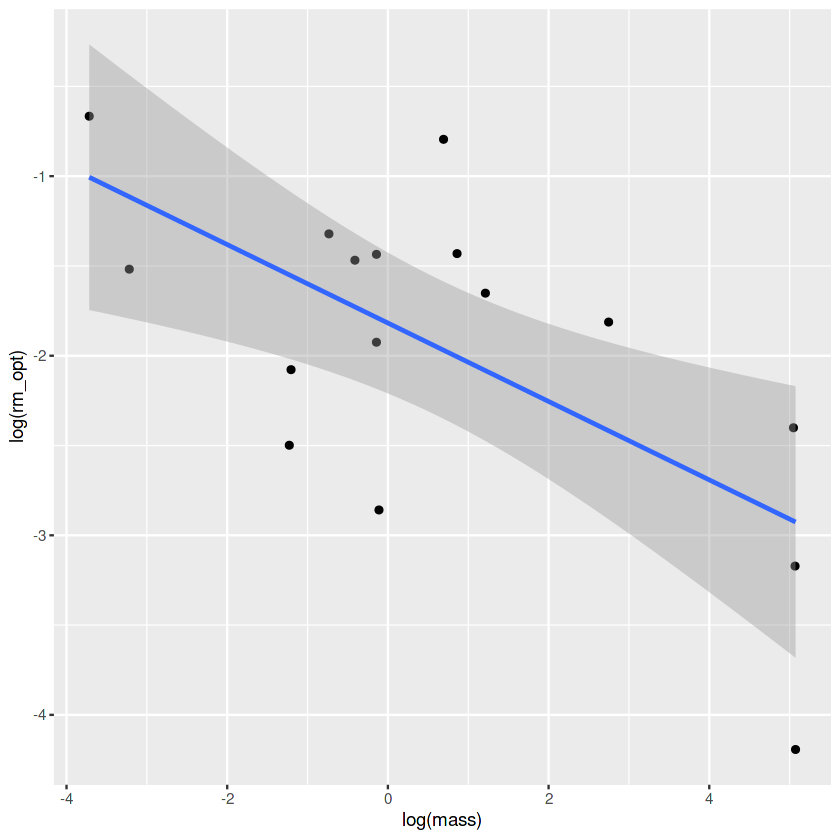

In [464]:
#plot uncorrected data in log-log scale
rm_data %>%
  ggplot(aes(x=log(mass), y = log(rm_opt)))+
  geom_point()+
  geom_smooth(method = 'lm')


`geom_smooth()` using formula 'y ~ x'



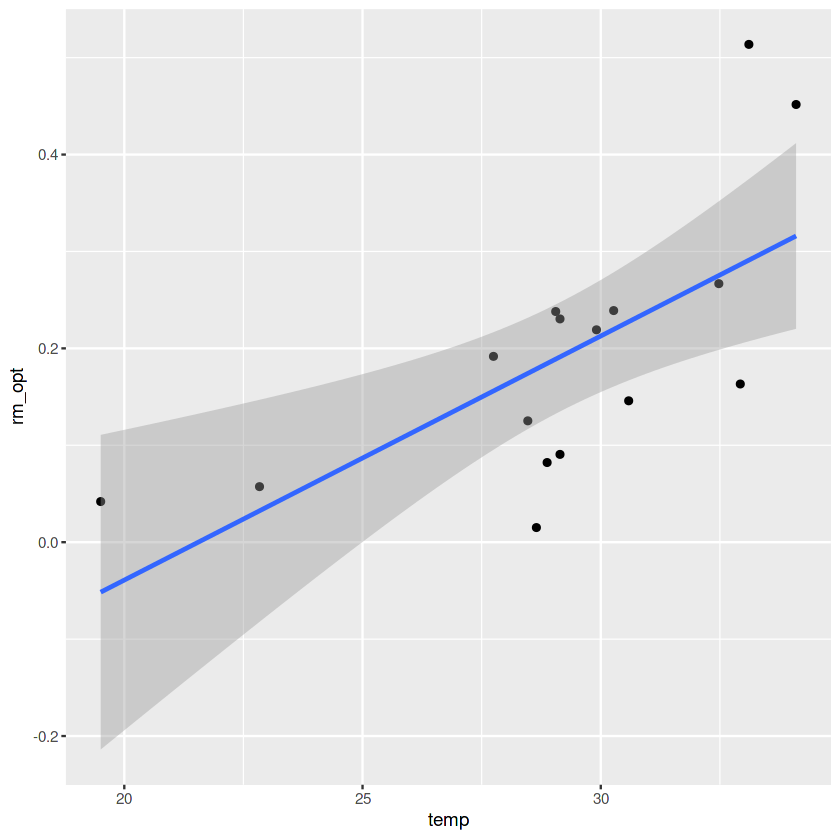

In [465]:
#plot rm_opt vs T
rm_data %>%
  ggplot(aes(x = temp, y = rm_opt)) +
  geom_point()+
  geom_smooth(method = 'lm')

In [467]:
# linear model (note the allometry is linear in log-log scale)
rm_model <- lm(log(rm_opt) ~ log(mass) + kT, data = rm_data)
summary(rm_model)
coef(rm_model)

save(rm_model,file="../results/rm_MTE_model.Rdata")

cf <-  confint(rm_model,level = .95)
anova(rm_model)


Call:
lm(formula = log(rm_opt) ~ log(mass) + kT, data = rm_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4796 -0.2692  0.1033  0.4119  0.6153 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 32.42463   13.62979   2.379   0.0334 *
log(mass)   -0.15841    0.06281  -2.522   0.0255 *
kT          -0.89293    0.35540  -2.512   0.0260 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6066 on 13 degrees of freedom
Multiple R-squared:  0.6114,	Adjusted R-squared:  0.5516 
F-statistic: 10.22 on 2 and 13 DF,  p-value: 0.002148


(Intercept)   log(mass)          kT 
 32.4246261  -0.1584063  -0.8929265

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,5.201958,5.2019582,14.137038,0.002382064
kT,1,2.322824,2.3228239,6.312594,0.025969712
Residuals,13,4.783566,0.3679666,NA,NA


Warning message in log(rm_optLwr/mass^cf[2]):
“NaNs produced”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


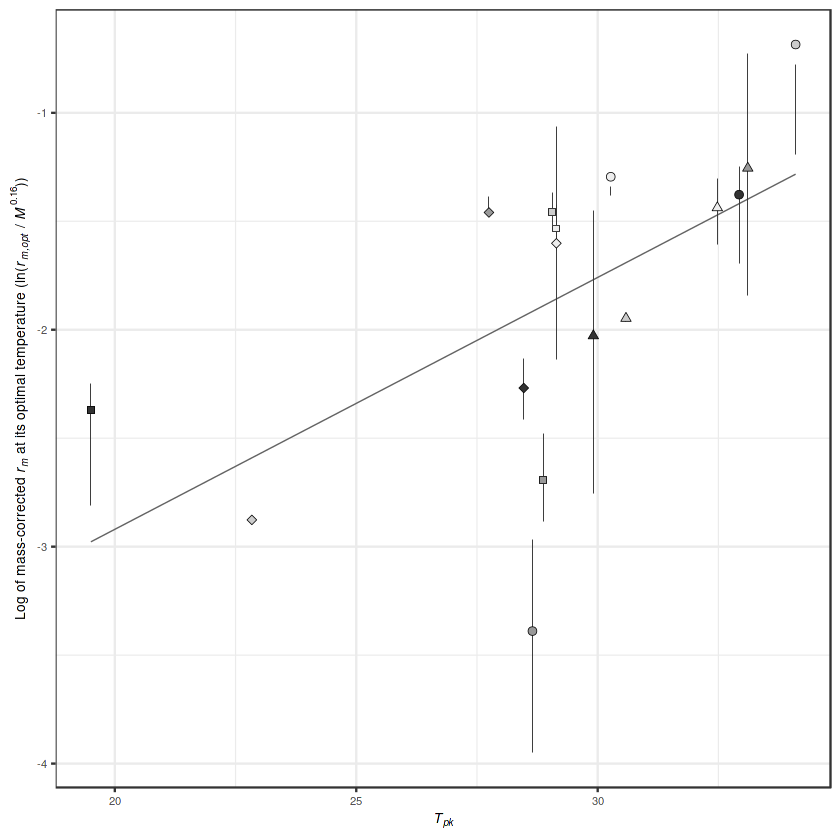

In [409]:
#plot rm_opt in 1/kT, correcting for mass
MassCorrectedrm_opt <- 
rm_data %>%
  ggplot(aes(x = temp, y = log(rm_opt/mass^coef(rm_model)[2]))) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill=NA)+
  scale_y_continuous(expression(plain(paste("Log of mass-corrected ",italic(r[m])," at its optimal temperature (ln(",italic(r[paste(m,",", opt)])," / ",italic(M^-0.16),"))"))))+
  scale_x_continuous(expression(plain(paste(italic("T"[pk])))))+
  geom_linerange(aes(x=temp, 
                     ymin=log(rm_optLwr/mass^cf[2]), 
                     ymax=log(rm_optUpr/mass^cf[2,2]), colour=species), size=0.2)+
  geom_point(aes(shape = species, fill = species), size=2,stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=8,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  theme_bw()+
  theme(text = element_text(size=8),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.2, 'cm'))

MassCorrectedrm_opt

In [410]:
save_plot(MassCorrectedrm_opt, file="../results/MassCorrectedrm_opt_Tpk.pdf", 
          base_height=11,base_width = 10, base_asp = 0.75,units="cm")

Warning message in log(rm_optLwr/mass^cf[2]):
“NaNs produced”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


In [411]:
#=======================================================
# sum of trait Tpks versus mass corrected r_m, opt

Species <- rm_data$species

alphaTpks <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), conf_upper = as.numeric(conf_upper))

zjTpks <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))


zTpks <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))

bmaxTpks <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))


In [412]:
AllTpks <- bind_rows(alphaTpks,zjTpks,zTpks,bmaxTpks)

head(AllTpks)

param,species,estimate,conf_lower,conf_upper,trait
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
topt,Bemisia tabaci,29.751,29.33872,30.66100,juvenile development rate
topt,Tetraneura nigriabdominalis,30.648,30.50557,30.75143,juvenile development rate
topt,Stethorus punctillum,32.875,32.77005,33.01580,juvenile development rate
topt,Tetranychus mcdanieli,35.182,34.93494,35.79288,juvenile development rate
topt,Muscidifurax zaraptor,32.038,31.82976,32.45753,juvenile development rate
topt,Aphis nasturtii,30.874,29.73374,31.69951,juvenile development rate


In [413]:
write_csv(AllTpks, '../results/AllTpkParams.csv')

In [430]:
#Calculate variance and Sum

OptVar <- AllTpks %>% group_by(species) %>%
  summarise(variance = var(estimate))
OptSum <- AllTpks %>% group_by(species) %>%
  summarise(sum = sum(estimate))

SumPlot <- left_join(rm_data, OptSum) 

SumPlot[4,5] <- 0.0573

Joining, by = "species"



In [436]:
rm_data <- rm_data %>% inner_join(OptSum) %>% inner_join(OptVar)  %>% rename(sumtpks = sum, vartpks = variance)

Joining, by = "species"

Joining, by = "species"



ERROR: Error: Names must be unique.
[31m✖[39m These names are duplicated:
  * "sumtpks" at locations 7 and 9.
  * "vartpks" at locations 8 and 10.


In [439]:
rm_data

species,temp,rm_opt,rm_optLwr,rm_optUpr,mass,sumtpks,vartpks
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,28.64865,0.01510336,0.01157130,0.01719946,159.8000000,90.45300,59.55748
Stethorus punctillum,32.47748,0.26677117,0.24869431,0.27684512,0.4800000,95.21000,80.41428
Tetranychus mcdanieli,33.10811,0.51367500,0.47273769,0.52546725,0.0243000,97.77437,87.08893
Muscidifurax zaraptor,22.83784,0.05732966,-14.94375079,0.08514682,0.8950000,103.13400,46.36888
Aphis nasturtii,29.05405,0.23802002,0.22229341,0.25571627,0.8673000,87.82000,61.52582
Rhopalosiphum maidis,28.46847,0.12522888,0.12780680,0.12184787,0.2995714,95.84500,35.51883
Thrips hawaiiensis,29.90991,0.21916132,0.16393035,0.25197405,0.0400000,91.16300,43.32377
Helicoverpa armigera,29.14414,0.09061167,0.07829534,0.10532681,155.6976923,108.46900,45.68967
Halyomorpha halys,19.50450,0.04194211,0.02374344,0.05366239,158.8100000,109.15500,43.70063


In [440]:
write_csv(rm_data, '../results/rm_optSizeScaling_w_tpksums.csv')

`geom_smooth()` using formula 'y ~ x'



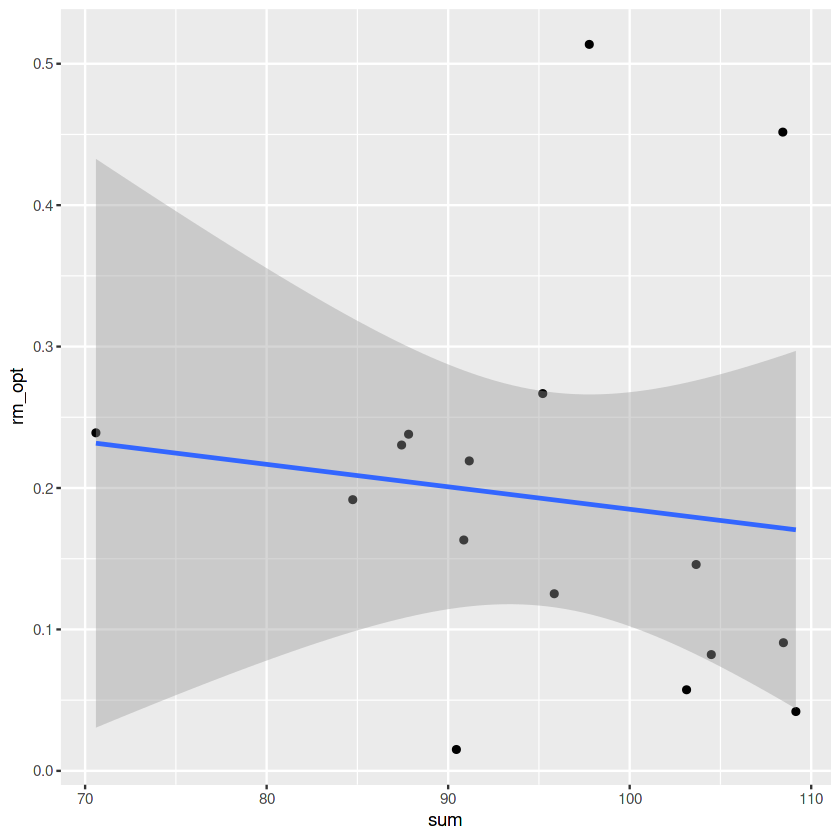

In [415]:
#plot rm_opt vs Sum of Tpks
SumPlot %>%
  ggplot(aes(x=sum, y = rm_opt))+
  geom_point()+
  geom_smooth(method = 'lm')

In [441]:
coef(rm_model)[2]

log(mass) 
-0.1584063

Warning message in log(rm_optLwr/mass^cf[2]):
“NaNs produced”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


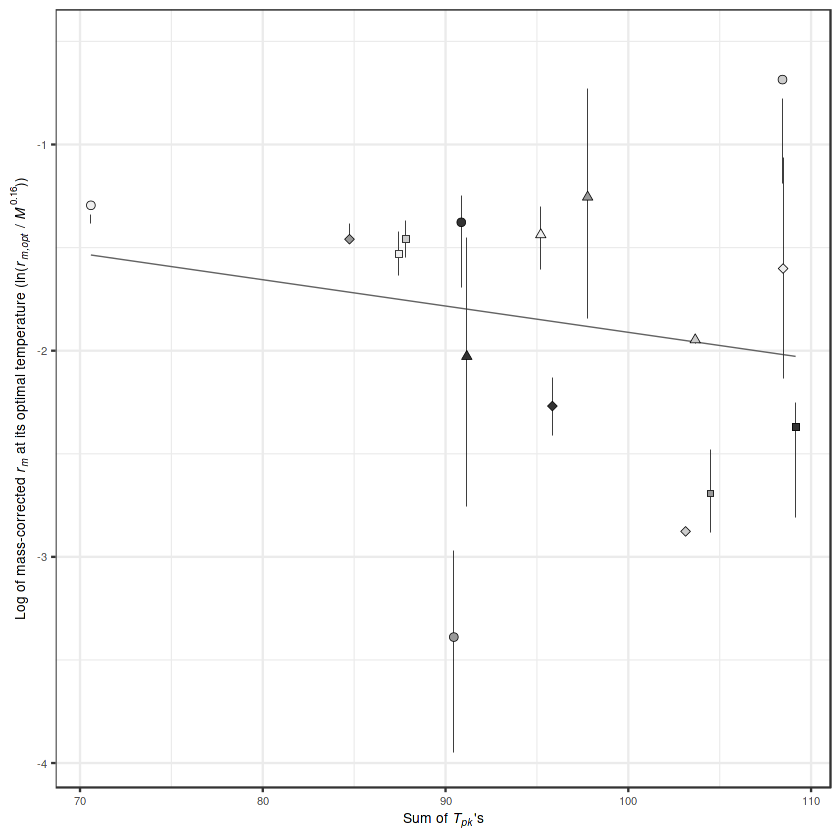

In [418]:
# Same with r_m in log scale

SumTpks_plot <-
  SumPlot %>%
  ggplot(aes(x = sum, y = log(rm_opt/mass^coef(rm_model)[2])))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill=NA)+
  scale_y_continuous(expression(plain(paste("Log of mass-corrected ",italic(r[m])," at its optimal temperature (ln(",italic(r[paste(m,",", opt)])," / ",italic(M^-0.16),"))"))))+
  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"'s"))))+
  geom_linerange(aes(x=sum, 
                     ymin=log(rm_optLwr/mass^cf[2]), 
                     ymax=log(rm_optUpr/mass^cf[2,2]), colour=species), size=0.2)+
  geom_point(aes(shape=species, 
                 fill=species),
             size=2,
             stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=16,ncol=1,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=1,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text = element_text(size=8),
        legend.position = 'none',
        legend.text = element_text(size = 5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))

SumTpks_plot

In [419]:
#±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±
#relationship between r_m opt and 1/alpha Tpk

alphaMass <- as_tibble(read_csv('../data/a_pksT_pksMass.csv')) %>% 
  select(species, a_pk, a_pkLwr, a_pkUpr, mass) %>%
         mutate(curve_ID = eval(parse(text=spps))) %>%
        filter(curve_ID != 'NA') %>% 
        rename(alphaspecies = species, alphamass = mass, alphacurve = curve_ID ) %>%
        arrange(alphacurve)

alpharm_data <- bind_cols(rm_data, alphaMass) %>% 
                select(-alphaspecies,-alphamass, -alphacurve)


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  a_pk = col_double(),
  a_pkLwr = col_double(),
  a_pkUpr = col_double(),
  species = col_character(),
  curve_ID = col_double(),
  T_pk = col_double(),
  T_pkLwr = col_double(),
  T_pkUpr = col_double(),
  mass = col_double()
)




In [420]:
# linear model (note the allometry is linear in log-log scale)
alpharm_model <- lm(log(rm_opt/mass^-0.16) ~ log(a_pk/mass^-0.265), data = alpharm_data)
summary(alpharm_model)
anova(alpharm_model)


Call:
lm(formula = log(rm_opt/mass^-0.16) ~ log(a_pk/mass^-0.265), 
    data = alpharm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74536 -0.24091  0.00072  0.28304  0.65932 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.2232     0.3404  -0.656 0.522677    
log(a_pk/mass^-0.265)   0.7851     0.1554   5.053 0.000176 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4349 on 14 degrees of freedom
Multiple R-squared:  0.6459,	Adjusted R-squared:  0.6206 
F-statistic: 25.54 on 1 and 14 DF,  p-value: 0.0001762


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(a_pk/mass^-0.265),1,4.830369,4.8303692,25.5377,0.0001761807
Residuals,14,2.648052,0.1891466,NA,NA


`geom_smooth()` using formula 'y ~ x'



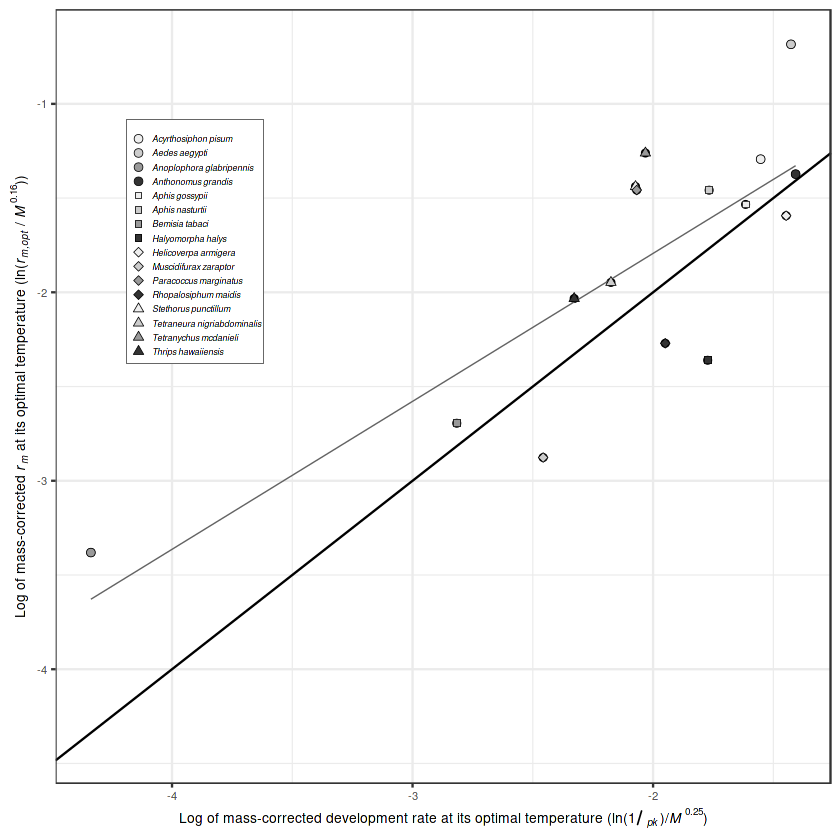

In [424]:
#plot a_pk vs r_opt

alpharm_plot <-
  alpharm_data %>%
  ggplot(aes(x=log(a_pk/mass^-0.265), y = log(rm_opt/mass^-0.16)))+
  geom_point()+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill=NA)+
  scale_y_continuous(expression(plain(paste("Log of mass-corrected ",italic(r[m])," at its optimal temperature (ln(",italic(r[paste(m,",", opt)])," / ",italic(M^-0.16),"))"))))+
  scale_x_continuous(expression(plain(paste("Log of mass-corrected development rate at its optimal temperature (ln(", italic(1/alpha[pk])~")/",italic(M^-0.25),")"))))+
  geom_point(aes(shape=species, 
                 fill=species), size=2, stroke=0.25)+
  geom_abline(slope=1)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=16,ncol=1,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=1,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text = element_text(size=8),
        legend.position = c(0.18, 0.7),
        legend.text = element_text(size = 5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))

alpharm_plot

In [422]:
save_plot(alpharm_plot, file="../results/alpharm_plot.pdf", 
          base_height=11,base_width = 12, base_asp = 0.75,units="cm")

`geom_smooth()` using formula 'y ~ x'



p1 <- MassCorrectedrm_opt + alpharm_plot + SumTpks_plot; p1

save_plot(p1, file="../results/r_mPlots.pdf", 
          base_height=11,base_width = 35, base_asp = 0.75,units="cm")